In [1]:
from LTSpice_Simulator import get_Spice_Arrays
import Wavefront_Generation as MC
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
input_values ={
    'L_time':'90',
    'C_time':'81',
    'L_impedance':'100',
    'number_periods':'1'
}

interface = MC.Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        4500
Inductor Capacitance Per Length :       0.45
Inductor Length :                       1
Inductor Total Inductance :             4500
Inductor Total Capacitance :            0.45
Inductor Velocity :                     0.02222222222222222222222222222
Inductor One Way Time Delay :           45
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       40.5
Capacitor Capacitance Per Length :      40.5
Capacitor Length :                      1
Capacitor Total Inductance :            40.5
Capacitor Total Capacitance :           40.5
Capacitor Velocity :                    0.02469135802469135802469135802
Capacitor One Way Time Delay :          40.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  2682.338831765123869392511204
Number of Wavefronts :                 

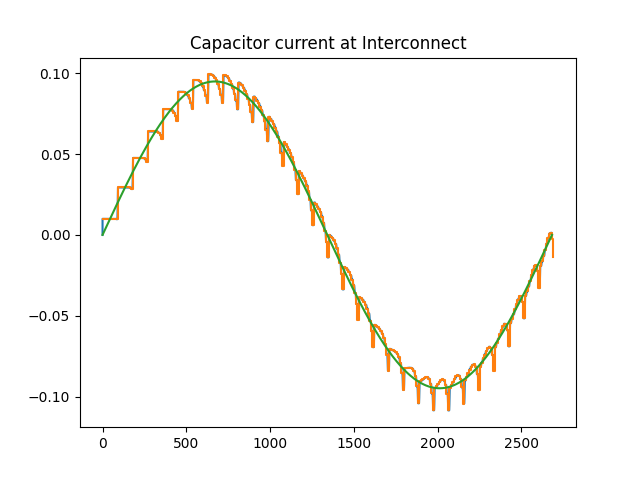

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

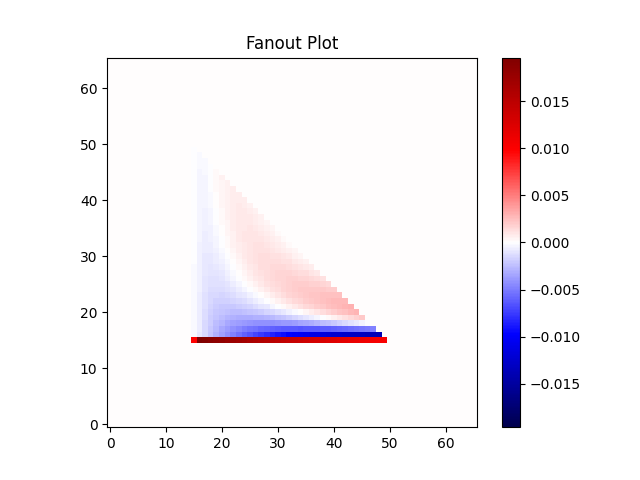

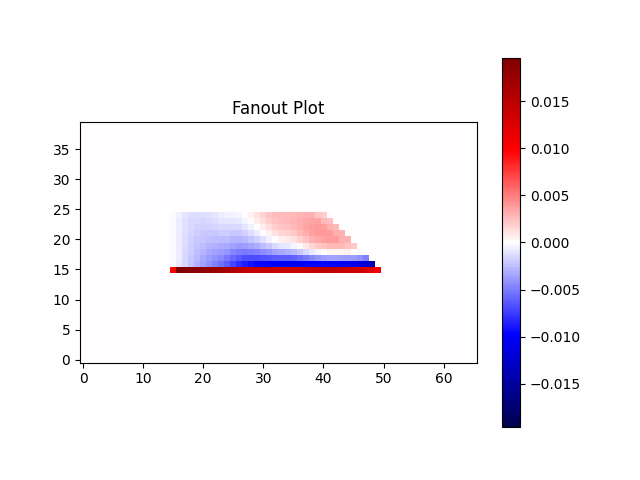

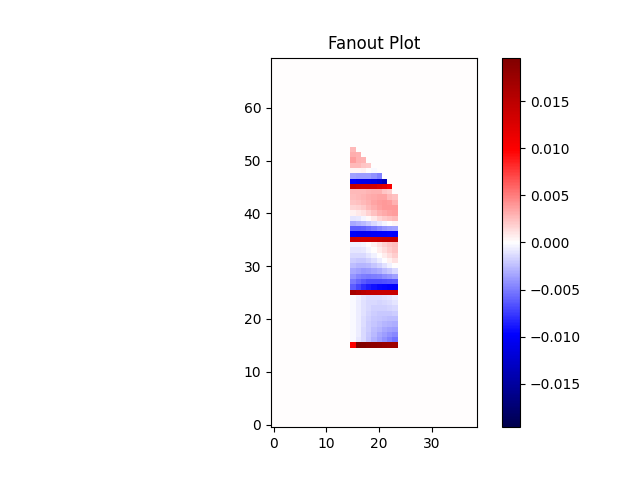

In [4]:
fig_fanout_commutative,ax_fanout_commutative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_commutative.Current_Interconnect_Capacitor.transpose(),ax_fanout_commutative)

fig_fanout_multiplicative,ax_fanout_multiplicative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_multiplicative.Current_Interconnect_Capacitor.transpose(),ax_fanout_multiplicative)

fig_fanout_multiplicative_alt,ax_fanout_multiplicative_alt = plt.subplots()
C_axis_merged = MC.transform_merged_array_to_C_axis(interface.data_input,interface.data_output_multiplicative.Current_Interconnect_Capacitor)
WP.plot_fanout_seismic(C_axis_merged.transpose(),ax_fanout_multiplicative_alt)

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=2681.338831765124)

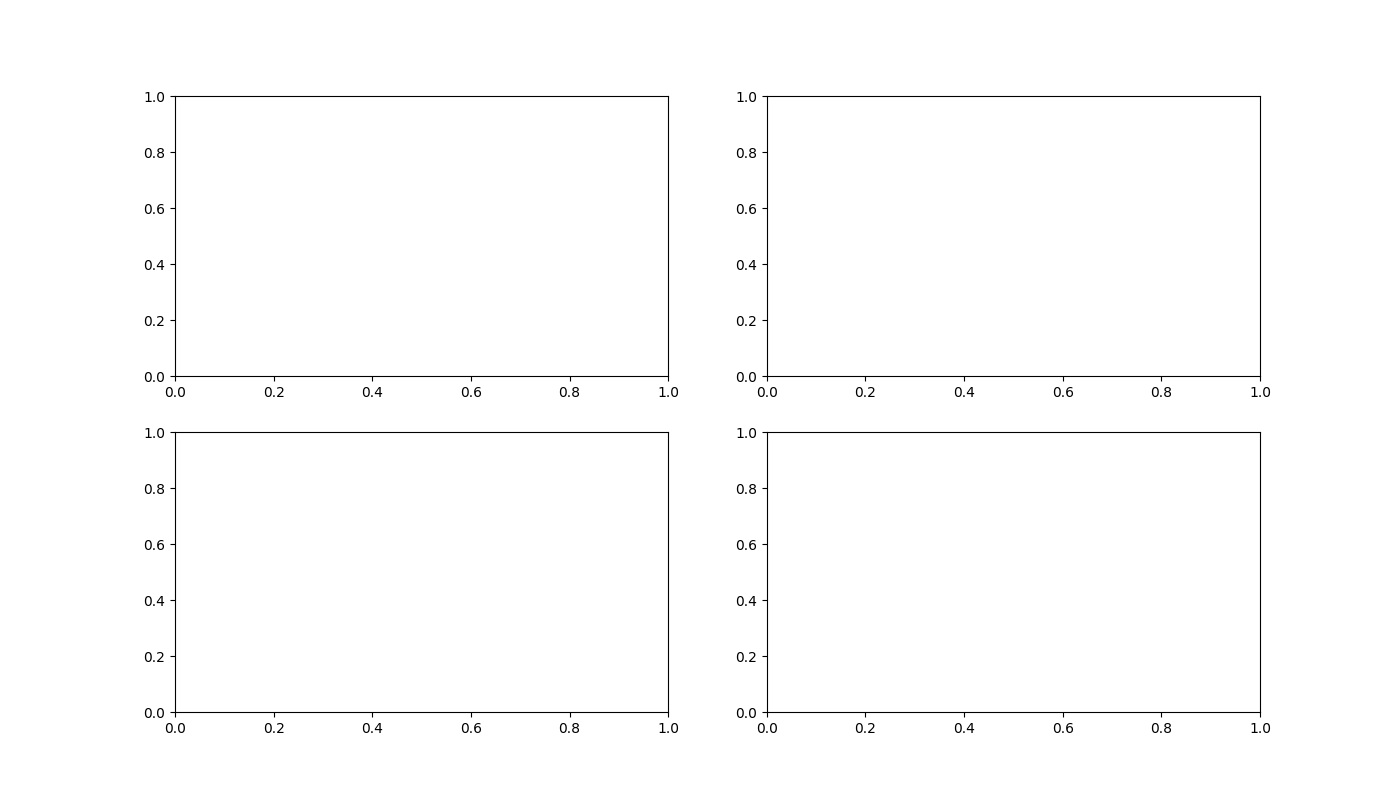

In [5]:
WP.spatial_interconnect_investigator_ui(interface)

In [6]:
wavefront_inductive_1 = interface.data_output_commutative.Wavefronts_Sending_Inductor[0,0]
wavefront_inductive_2 = interface.data_output_commutative.Wavefronts_Sending_Inductor[0,8]
wavefront_capacitive_1 = interface.data_output_commutative.Wavefronts_Sending_Capacitor[0,0]
wavefront_capacitive_2 = interface.data_output_commutative.Wavefronts_Sending_Capacitor[0,8]